## Neural Networks with Tensorflow and Esitmator API
- Vishwa Mohan Singh
- PC14
- TY CSE - Panel C

In [4]:
import os
#Setting the device to CPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

#Importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd

In [5]:
#Importing the dataset
dataset = pd.read_csv('census_data.csv')

In [7]:
#Extracting and processing the lables
Y = dataset['income_bracket']
Y = Y.apply(lambda x: 0 if x == " <=50K" else 1)
#Getting the attributes
X = dataset.drop('income_bracket',axis = 1)
#Scaling the values [Min-Max scaling]
to_scale = ['capital_gain',
       'capital_loss', 'hours_per_week','education_num']
X[to_scale] = X[to_scale].apply(lambda x : (x-x.min())/(x.max()-x.min()))

In [8]:
X.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,50,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,38,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,53,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,28,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


In [9]:
#Feature columns for categorical data
workc = tf.feature_column.embedding_column(tf.feature_column.categorical_column_with_hash_bucket('workclass',hash_bucket_size=10), dimension=9)
educ = tf.feature_column.embedding_column((tf.feature_column.categorical_column_with_hash_bucket('education',hash_bucket_size=10)),dimension=16)
marital = tf.feature_column.embedding_column(tf.feature_column.categorical_column_with_hash_bucket('marital_status',hash_bucket_size=10),dimension=7)
race = tf.feature_column.embedding_column(tf.feature_column.categorical_column_with_hash_bucket('race',hash_bucket_size=10),dimension=5)
gender = tf.feature_column.embedding_column(tf.feature_column.categorical_column_with_hash_bucket('gender',hash_bucket_size=2),dimension=2)
country = tf.feature_column.embedding_column(tf.feature_column.categorical_column_with_hash_bucket('native_country',hash_bucket_size=50),dimension=42)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ADB86E55F8>]], dtype=object)

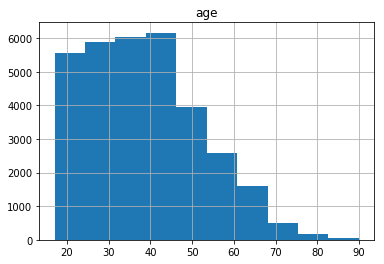

In [11]:
dataset.hist(column='age')

In [12]:
#Bins for age to convert them to categorical data
age = tf.feature_column.bucketized_column(tf.feature_column.numeric_column('age'),boundaries=[20,30,40,50,60,70,80,90])

In [13]:
#making numeric columns
cap_gain = tf.feature_column.numeric_column('capital_gain')
cap_loss = tf.feature_column.numeric_column('capital_loss')
hrs = tf.feature_column.numeric_column('hours_per_week')
edu_num = tf.feature_column.numeric_column('education_num')

In [14]:
fea_col = [cap_gain,cap_loss,hrs,age,workc,educ,marital,race,gender,country,edu_num]

In [16]:
#Creating the training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 101)

In [17]:
#Getting the neural network model from estimator API
model = tf.estimator.DNNClassifier(hidden_units=[10,10,10,10],feature_columns=fea_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpce14_sz7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001ADB95BB160>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [18]:
#Setting the input to the estimator API
input_f = tf.estimator.inputs.pandas_input_fn(x=X_train,y=Y_train,shuffle=True,batch_size=10,num_epochs=100)

In [19]:
#Training the model
model.train(input_fn=input_f,steps=10000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Admin\AppData\Local\Temp\tmpce14_sz7\model.ckpt.
INFO:tensorflow:loss = 8.53262, step = 1
INFO:tensorflow:global_step/sec: 160.181
INFO:tensorflow:loss = 4.29007, step = 101 (0.615 sec)
INFO:tensorflow:global_step/sec: 343.383
INFO:tensorflow:loss = 2.73161, step = 201 (0.286 sec)
INFO:tensorflow:global_step/sec: 359.381
INFO:tensorflow:loss = 3.47477, step = 301 (0.282 sec)
INFO:tensorflow:global_step/sec: 354.303
INFO:tensorflow:loss = 5.6736, step = 40

INFO:tensorflow:loss = 2.12954, step = 7101 (0.325 sec)
INFO:tensorflow:global_step/sec: 293.18
INFO:tensorflow:loss = 2.84257, step = 7201 (0.338 sec)
INFO:tensorflow:global_step/sec: 338.741
INFO:tensorflow:loss = 5.37407, step = 7301 (0.297 sec)
INFO:tensorflow:global_step/sec: 321.371
INFO:tensorflow:loss = 6.91366, step = 7401 (0.315 sec)
INFO:tensorflow:global_step/sec: 323.443
INFO:tensorflow:loss = 3.87554, step = 7501 (0.306 sec)
INFO:tensorflow:global_step/sec: 306.63
INFO:tensorflow:loss = 1.02679, step = 7601 (0.329 sec)
INFO:tensorflow:global_step/sec: 292.323
INFO:tensorflow:loss = 2.81241, step = 7701 (0.341 sec)
INFO:tensorflow:global_step/sec: 313.338
INFO:tensorflow:loss = 5.23501, step = 7801 (0.317 sec)
INFO:tensorflow:global_step/sec: 315.307
INFO:tensorflow:loss = 3.6332, step = 7901 (0.323 sec)
INFO:tensorflow:global_step/sec: 324.489
INFO:tensorflow:loss = 2.37969, step = 8001 (0.300 sec)
INFO:tensorflow:global_step/sec: 302.011
INFO:tensorflow:loss = 6.61446, s

In [20]:
#Getting the predictions on the test set
pre_input_f = tf.estimator.inputs.pandas_input_fn(x=X_test,y=Y_test,shuffle=False)
predictions = []
for pred in list(model.predict(pre_input_f)):
    predictions.append(pred['class_ids'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpce14_sz7\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [21]:
#Displaying the evaluation result
print(model.evaluate(input_fn=pre_input_f,steps=1000))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-14-20:58:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpce14_sz7\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-14-20:58:18
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.853004, accuracy_baseline = 0.761183, auc = 0.902843, auc_precision_recall = 0.760447, average_loss = 0.324059, global_step = 10000, label/mean = 0.238817, loss = 41.1135, precision = 0.757611, prediction/mean = 0.231886, recall = 0.565367
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: C:\Users\Admin\AppData\Local\Temp\tmpce14_sz7\model.ckpt-10000
{'accuracy': 0.8530044, 'accuracy_baseline': 0.76118332, 'auc': 0.902843, 'auc_precision_recall': 0.76044744, 'average_loss': 0.3240594, 'label/m